<a href="https://colab.research.google.com/github/mercy09/ijeoma/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [5]:
df_training=pd.read_csv('/content/twitter_training.csv')
df_validation=pd.read_csv('/content/twitter_validation.csv')

In [28]:
df = pd.concat([df_training, df_validation], ignore_index=True)
df

,tweet_id,entity,sentiment,tweet_content
0,2401,Borderlands,Positive,i am coming to the borders and i will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you all
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74989,4891,GrandTheftAuto(GTA),Irrelevant,toronto is the arts and culture capital of can...
74990,4359,CS-GO,Irrelevant,this is actually a good move tot bring more vi...
74991,2652,Borderlands,Positive,today sucked so its time to drink wine n play ...
74992,8069,Microsoft,Positive,bought a fraction of microsoft today small wins


In [29]:
df_training.head()


,tweet_id,entity,sentiment,tweet_content
0,2401,Borderlands,Positive,i am coming to the borders and i will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you all
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [9]:
df_validation.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [11]:
# Rename columns for both dataframes
df_training.columns = ['tweet_id', 'entity', 'sentiment', 'tweet_content']
df_validation.columns = ['tweet_id', 'entity', 'sentiment', 'tweet_content']


,tweet_id,entity,sentiment,tweet_content
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [12]:
#check for null text
df_training.isnull().sum()

,0
tweet_id,0
entity,0
sentiment,0
tweet_content,686


In [14]:
df_validation.isnull().sum()

,0
tweet_id,0
entity,0
sentiment,0
tweet_content,0


In [16]:
df_training = df_training.dropna()
df_validation = df_validation.dropna()
df_training.head()

,tweet_id,entity,sentiment,tweet_content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [18]:
df_training_sample = df_training.iloc[:10000]

,tweet_id,entity,sentiment,tweet_content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [19]:
import re

def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www.\S+', '', text)
    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df_training['tweet_content'] = df_training['tweet_content'].apply(clean_text)
df_validation['tweet_content'] = df_validation['tweet_content'].apply(clean_text)

In [20]:
df_training.head()

,tweet_id,entity,sentiment,tweet_content
0,2401,Borderlands,Positive,i am coming to the borders and i will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you all
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [21]:
df_validation.head()

,tweet_id,entity,sentiment,tweet_content
0,352,Amazon,Neutral,bbc news amazon boss jeff bezos rejects claims...
1,8312,Microsoft,Negative,why do i pay for word when it functions so poo...
2,4371,CS-GO,Negative,csgo matchmaking is so full of closet hacking ...
3,4433,Google,Neutral,now the president is slapping americans in the...
4,6273,FIFA,Negative,hi ive had madeleine mccann in my cellar for t...


In [22]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(df_training['tweet_content'])
X_validation = vectorizer.transform(df_validation['tweet_content'])

In [25]:
y_train = df_training['sentiment']
y_validation = df_validation['sentiment']

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict on validation set
y_pred = rf_clf.predict(X_validation)

# Confusion matrix
cm = confusion_matrix(y_validation, y_pred)
print("Confusion Matrix:\n", cm)

# Classification report for more detailed evaluation
print("\nClassification Report:\n", classification_report(y_validation, y_pred))

Confusion Matrix:
 [[167   1   0   3]
 [  0 264   1   1]
 [  1   4 277   3]
 [  1   1   2 273]]

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.99      0.98      0.98       171
    Negative       0.98      0.99      0.99       266
     Neutral       0.99      0.97      0.98       285
    Positive       0.97      0.99      0.98       277

    accuracy                           0.98       999
   macro avg       0.98      0.98      0.98       999
weighted avg       0.98      0.98      0.98       999



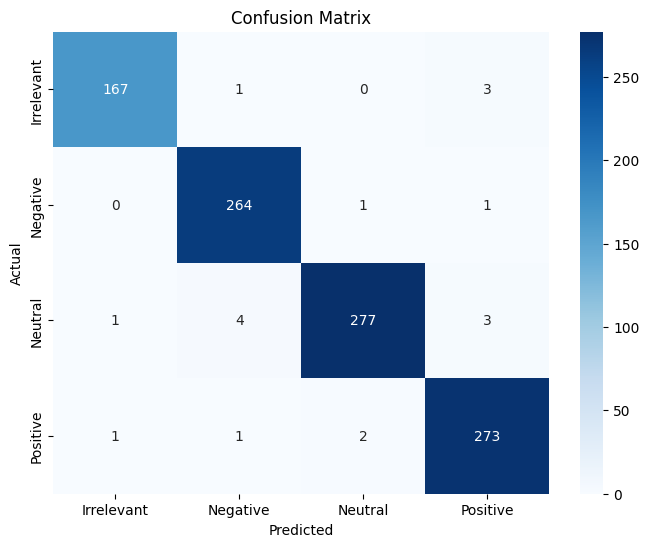

In [27]:
import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=rf_clf.classes_,
            yticklabels=rf_clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
